In [1]:
# Install required packages.
import os

#!pip install torch==1.7.0
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)


!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git
!pip install git+https://github.com/rusty1s/pytorch_geometric.git

2.0.1+cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 42.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/rusty1s/pytorch_geometric.git to /tmp/pip-req-build-u96fttmn
  Running command git clone --filter=blob:none --quiet https://github.com/rusty1s/pytorch_geometric.git /tmp/pip-req-build-u96fttmn
  Resolved https://github.com/rusty1s/pytorch_geometric.git to commit 7ac4654db727df73d1443c5102020abe859e5eb6
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
import argparse
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from math import sqrt
import math

from torch_geometric.datasets import TUDataset

import torch as th
import torch
import torch.nn as nn
from torch import Tensor
from torch.nn.parameter import Parameter
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
from torch.nn import Linear, LayerNorm
from sklearn import metrics
from scipy.spatial.distance import hamming
import statistics
import pandas
from time import perf_counter
from IPython.core.display import deepcopy
from torch_geometric.nn import MessagePassing
import copy
from torch.nn import ReLU, Sequential
from torch import sigmoid
from itertools import chain
from time import perf_counter
from torch_geometric.data import Data, Batch, Dataset
from functools import partial
from torch_geometric.utils import to_networkx
from torch_geometric.utils import remove_self_loops
from typing import Callable, Union, Optional
#from torch_geometric.utils.num_nodes import maybe_num_nodes
import networkx as nx
from typing import List, Tuple, Dict
from collections import Counter
import statistics
from scipy import stats
import logging
import pandas as pd
import csv


from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.loader import DataLoader
import torch_geometric.nn as gnn

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = TUDataset(root='data/TUDataset', name='MUTAG')

Extracting data/TUDataset/MUTAG/MUTAG.zip
Processing...
Done!


In [5]:
Explainability_name = 'PGMExplainer'
Task_name = 'Graph Classification'
Model_Name = "DGCNN"
checkpoint_directory_Classifier = "/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/model_classifier.pt"
DataSet_name = "MUTAG"
classifier_lr = 0.001
classifier_dropout = 0.1
classifier_weight_decay = 1e-6
classifier_bias = True

File_Name = Model_Name + " " + Explainability_name + " " + Task_name + " " + DataSet_name + " "

In [6]:
#train_dataset, test_dataset = train_test_split(dataset, test_size=0.3, random_state=0, shuffle=True)
#print("Number of Training Graphs: ", len(train_dataset))
#print("Number of Test Graphs: ", len(test_dataset))

df = pandas.read_csv("/content/drive/My Drive/Explainability Methods/Train and Test Indexes on Graph Classification/Experimental Results/train_test_indexes.csv")

read_training_list_indexes__ = df['Train Indexes']
read_test_list_indexes__ = df['Test Indexes']
read_test_list_indexes__ = read_test_list_indexes__.dropna()
read_test_list_indexes = []
read_training_list_indexes = []
for element in read_test_list_indexes__:
    read_test_list_indexes.append(int(element))
for element in read_training_list_indexes__:
    read_training_list_indexes.append(int(element))


print(read_training_list_indexes)
print(read_test_list_indexes)

train_dataset = []
test_dataset = []
for index in read_training_list_indexes:
    train_dataset.append(dataset[index])
for index in read_test_list_indexes:
    test_dataset.append(dataset[index])


print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

[51, 142, 143, 10, 4, 141, 125, 23, 3, 79, 28, 117, 136, 156, 83, 128, 109, 70, 31, 58, 7, 148, 14, 187, 20, 162, 123, 13, 91, 185, 169, 102, 32, 55, 119, 25, 161, 175, 52, 121, 152, 108, 113, 65, 39, 103, 131, 42, 166, 110, 160, 68, 90, 89, 64, 172, 159, 72, 170, 18, 122, 29, 179, 49, 171, 178, 9, 74, 96, 48, 181, 127, 126, 87, 12, 163, 88, 53, 94, 146, 5, 158, 16, 67, 6, 59, 164, 151, 34, 47, 54, 46, 100, 112, 93, 182, 66, 106, 124, 19, 186, 133, 45, 15, 40, 167, 174, 98, 105, 153, 61, 63, 132, 116, 43, 80, 33, 147, 165, 69, 135, 86, 76, 57, 173, 115, 138, 140, 134, 180, 95, 22, 38, 41, 24, 120, 145, 26, 21, 50, 176, 107, 78, 17, 85, 154, 60, 92, 184, 129]
[0, 1, 2, 8, 11, 27, 30, 35, 36, 37, 44, 56, 62, 71, 73, 75, 77, 81, 82, 84, 97, 99, 101, 104, 111, 114, 118, 130, 137, 139, 144, 149, 150, 155, 157, 168, 177, 183]
Number of training graphs: 150
Number of test graphs: 38


In [7]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [8]:
import sys
py_path = '/content/drive/MyDrive/Explainability Methods/Models/Script/'
sys.path.insert(0,py_path)

import DGCNN as dgcnn_model
GNN_Model = dgcnn_model.DGCNN_Model(GNN_layers=[32, 32, 32, 7], num_classes=2, mlp_act_fun='ReLu', dgcnn_act_fun='tanh',
                                    mlp_dropout_rate=0.5, Weight_Initializer=3, Bias=False, dgcnn_k=17, node_feat_size=7,
                                    hid_channels=[16,32], conv1d_kernels=[2,5], ffn_layer_size=128, strides=[2,1])

tanh is Selected.


In [9]:
GNN_Model_Optimizer = torch.optim.Adam(GNN_Model.parameters(), lr=classifier_lr, weight_decay=classifier_weight_decay)

In [10]:
criterion = torch.nn.CrossEntropyLoss()
def loss_calculations(preds, gtruth):
    loss_per_epoch = criterion(preds, gtruth)
    return loss_per_epoch

In [11]:
def visualize_losses(GNN_Model_losses, epoch_history):
    GNN_Model_losses_list = torch.stack(GNN_Model_losses).cpu().detach().numpy()

    fig = plt.figure(figsize=(27,20))

    ax = plt.subplot2grid((3, 1), (0, 0), colspan=1)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(" Loss in Epoch: " + str(epoch_history))

    ax.plot(GNN_Model_losses_list, color='r')

    plt.savefig('/content/drive/My Drive/Explainability Methods/'+str(Explainability_name)+' on ' + str(Task_name) + '/Experimental Results/' + File_Name + 'Loss_til_epoch_{:04d}.png'.format(epoch_history))
    plt.show()


In [12]:
def train_step():
    GNN_Model_loss_batch = []
    Pred_Labels = []
    Real_Labels = []

    GNN_Model.train()
    GNN_Model.zero_grad()
    for batch_of_graphs in train_dataloader:

        final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, softmaxed_h2 = GNN_Model(batch_of_graphs, None)
        batch_loss = loss_calculations(softmaxed_h2, batch_of_graphs.y)
        Pred_Labels.extend(softmaxed_h2.argmax(dim=1).detach().tolist())
        #print('passed')

        Real_Labels.extend(batch_of_graphs.y.detach().tolist())
        GNN_Model_loss_batch.append(batch_loss)

        batch_loss.backward()
        GNN_Model_Optimizer.step()

    return torch.mean(torch.tensor(GNN_Model_loss_batch)), metrics.accuracy_score(Real_Labels, Pred_Labels)

In [13]:
GNN_Model_training_Acc_per_epoch = []
GNN_Model_training_time_per_epoch = []
def train(EPOCHS, load_index):
    GNN_Model_training_loss_per_epoch = []

    for epoch in range(EPOCHS):
        t1 = perf_counter()
        GNN_Model_training_loss, training_acc = train_step()
        GNN_Model_training_time_per_epoch.append(perf_counter()-t1)
        print(f'Epoch: {epoch+1:03d}, Model Loss: {GNN_Model_training_loss:.4f}')

        GNN_Model_training_loss_per_epoch.append(GNN_Model_training_loss)
        GNN_Model_training_Acc_per_epoch.append(training_acc)
        #break

        if (epoch + load_index + 1) % 50 == 0 and epoch > 0:
            visualize_losses(GNN_Model_training_loss_per_epoch, epoch + load_index + 1)
        if (epoch + load_index + 1) % 100 == 0 and epoch > 0:
            torch.save({'epoch': epoch+load_index+1, 'model_state_dict': GNN_Model.state_dict(), 'optimizer_state_dict': GNN_Model_Optimizer.state_dict(), 'loss': GNN_Model_training_loss_per_epoch,}, "/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/" + File_Name + str(epoch + load_index + 1)+".pt")



Epoch: 001, Model Loss: 0.6923
Epoch: 002, Model Loss: 0.6913
Epoch: 003, Model Loss: 0.6905
Epoch: 004, Model Loss: 0.6891
Epoch: 005, Model Loss: 0.6873
Epoch: 006, Model Loss: 0.6842
Epoch: 007, Model Loss: 0.6820
Epoch: 008, Model Loss: 0.6777
Epoch: 009, Model Loss: 0.6729
Epoch: 010, Model Loss: 0.6662
Epoch: 011, Model Loss: 0.6614
Epoch: 012, Model Loss: 0.6518
Epoch: 013, Model Loss: 0.6447
Epoch: 014, Model Loss: 0.6326
Epoch: 015, Model Loss: 0.6215
Epoch: 016, Model Loss: 0.6145
Epoch: 017, Model Loss: 0.6075
Epoch: 018, Model Loss: 0.5951
Epoch: 019, Model Loss: 0.6030
Epoch: 020, Model Loss: 0.5966
Epoch: 021, Model Loss: 0.5901
Epoch: 022, Model Loss: 0.5927
Epoch: 023, Model Loss: 0.5900
Epoch: 024, Model Loss: 0.5833
Epoch: 025, Model Loss: 0.5776
Epoch: 026, Model Loss: 0.5649
Epoch: 027, Model Loss: 0.5633
Epoch: 028, Model Loss: 0.5554
Epoch: 029, Model Loss: 0.5472
Epoch: 030, Model Loss: 0.5404
Epoch: 031, Model Loss: 0.5243
Epoch: 032, Model Loss: 0.5137
Epoch: 0

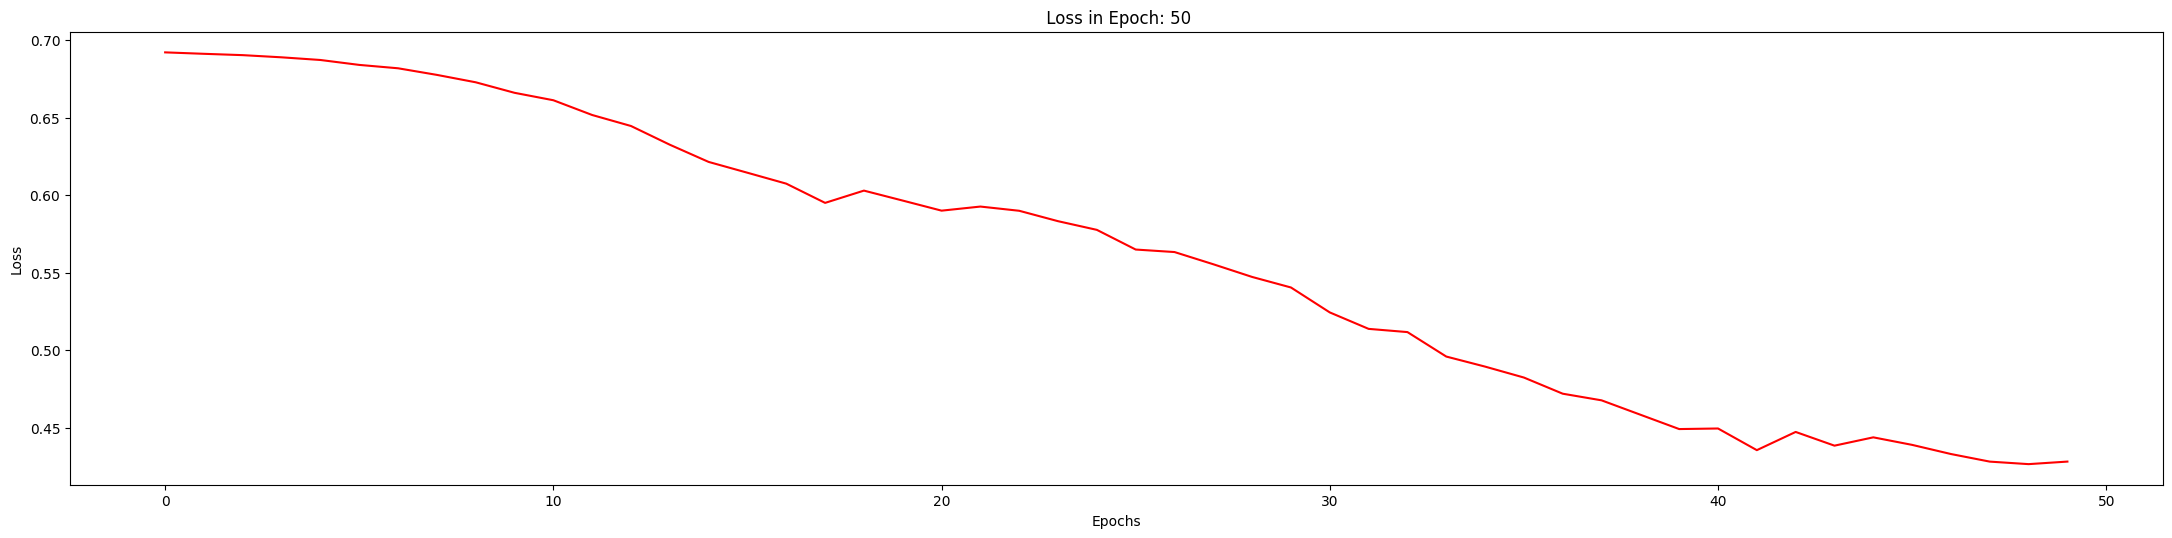

Epoch: 051, Model Loss: 0.4337
Epoch: 052, Model Loss: 0.4307
Epoch: 053, Model Loss: 0.4256
Epoch: 054, Model Loss: 0.4273
Epoch: 055, Model Loss: 0.4258
Epoch: 056, Model Loss: 0.4296
Epoch: 057, Model Loss: 0.4221
Epoch: 058, Model Loss: 0.4177
Epoch: 059, Model Loss: 0.4163
Epoch: 060, Model Loss: 0.4229
Epoch: 061, Model Loss: 0.4249
Epoch: 062, Model Loss: 0.4182
Epoch: 063, Model Loss: 0.4269
Epoch: 064, Model Loss: 0.4155
Epoch: 065, Model Loss: 0.4207
Epoch: 066, Model Loss: 0.4202
Epoch: 067, Model Loss: 0.4209
Epoch: 068, Model Loss: 0.4111
Epoch: 069, Model Loss: 0.4186
Epoch: 070, Model Loss: 0.4153
Epoch: 071, Model Loss: 0.4190
Epoch: 072, Model Loss: 0.4184
Epoch: 073, Model Loss: 0.4124
Epoch: 074, Model Loss: 0.4093
Epoch: 075, Model Loss: 0.4169
Epoch: 076, Model Loss: 0.4095
Epoch: 077, Model Loss: 0.4170
Epoch: 078, Model Loss: 0.4158
Epoch: 079, Model Loss: 0.4151
Epoch: 080, Model Loss: 0.4159
Epoch: 081, Model Loss: 0.4144
Epoch: 082, Model Loss: 0.4187
Epoch: 0

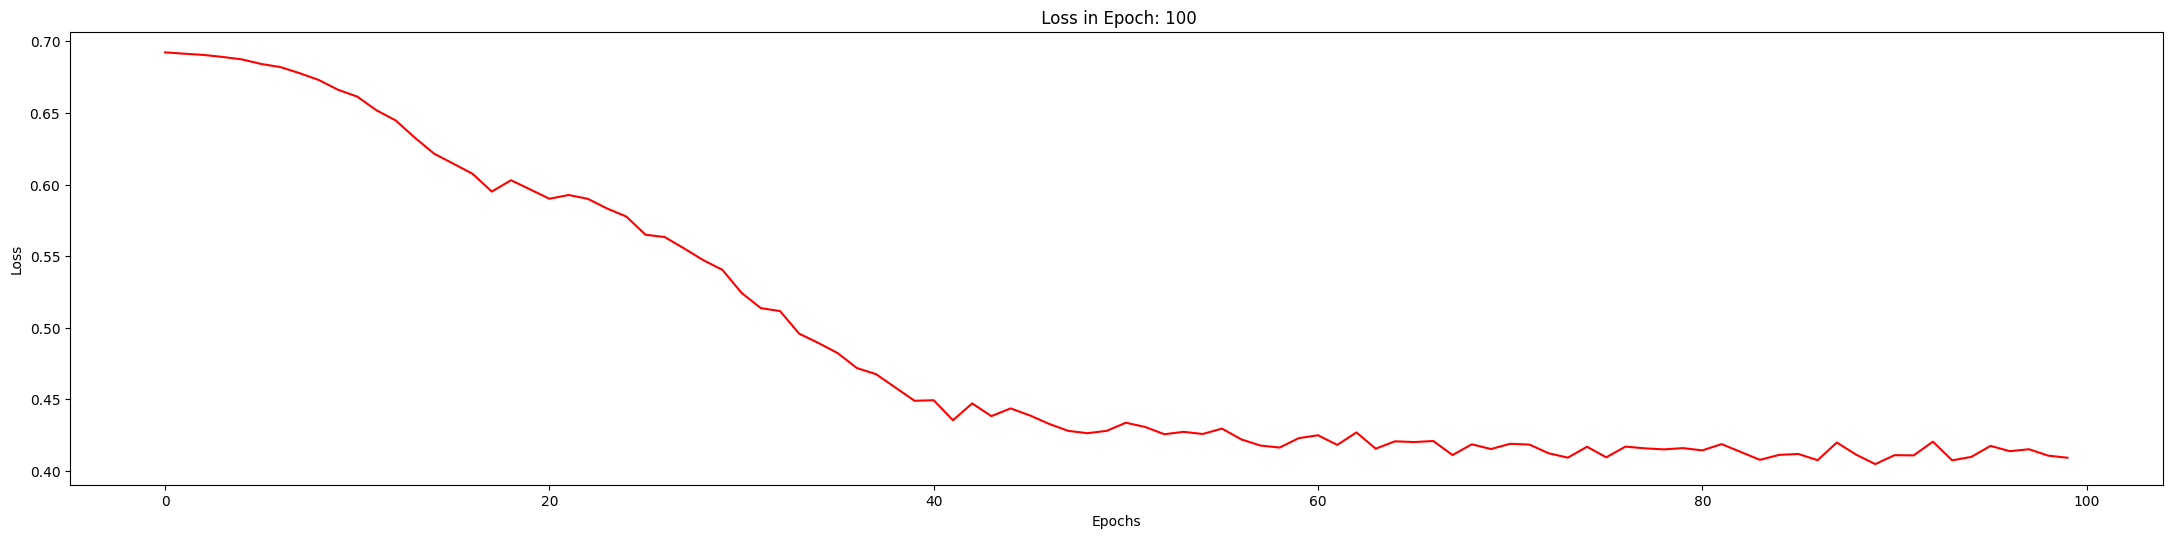

Epoch: 101, Model Loss: 0.4085
Epoch: 102, Model Loss: 0.4149
Epoch: 103, Model Loss: 0.4109
Epoch: 104, Model Loss: 0.4162
Epoch: 105, Model Loss: 0.4083
Epoch: 106, Model Loss: 0.4146
Epoch: 107, Model Loss: 0.4130
Epoch: 108, Model Loss: 0.4089
Epoch: 109, Model Loss: 0.4069
Epoch: 110, Model Loss: 0.4161
Epoch: 111, Model Loss: 0.4115
Epoch: 112, Model Loss: 0.4112
Epoch: 113, Model Loss: 0.4067
Epoch: 114, Model Loss: 0.4129
Epoch: 115, Model Loss: 0.4082
Epoch: 116, Model Loss: 0.4074
Epoch: 117, Model Loss: 0.4078
Epoch: 118, Model Loss: 0.4049
Epoch: 119, Model Loss: 0.4104
Epoch: 120, Model Loss: 0.4034
Epoch: 121, Model Loss: 0.4150
Epoch: 122, Model Loss: 0.4112
Epoch: 123, Model Loss: 0.4088
Epoch: 124, Model Loss: 0.4103
Epoch: 125, Model Loss: 0.4100
Epoch: 126, Model Loss: 0.4122
Epoch: 127, Model Loss: 0.4067
Epoch: 128, Model Loss: 0.4069
Epoch: 129, Model Loss: 0.4091
Epoch: 130, Model Loss: 0.4073
Epoch: 131, Model Loss: 0.4104
Epoch: 132, Model Loss: 0.4086
Epoch: 1

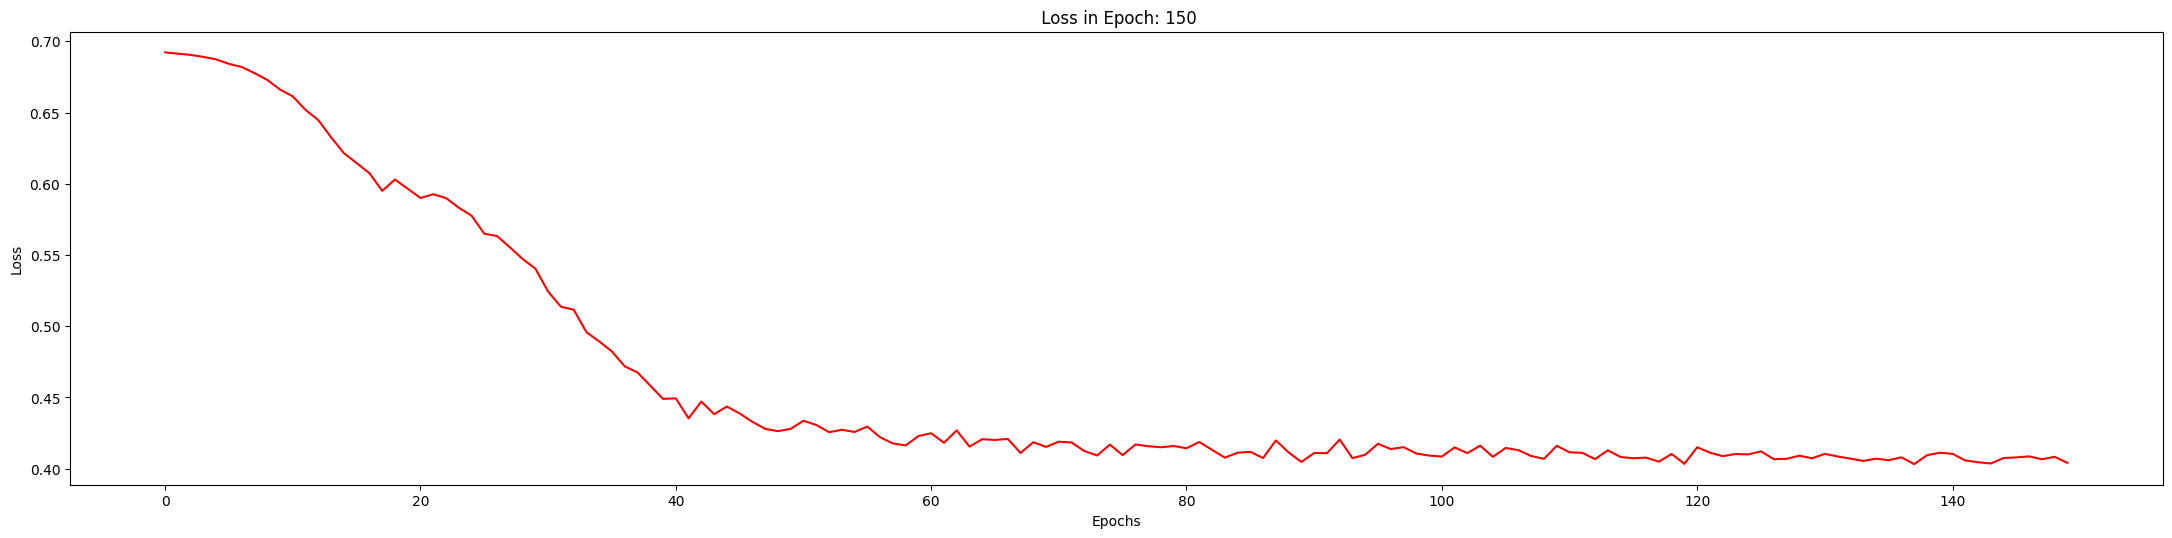

Epoch: 151, Model Loss: 0.4146
Epoch: 152, Model Loss: 0.4144
Epoch: 153, Model Loss: 0.4059
Epoch: 154, Model Loss: 0.4111
Epoch: 155, Model Loss: 0.4047
Epoch: 156, Model Loss: 0.4105
Epoch: 157, Model Loss: 0.4054
Epoch: 158, Model Loss: 0.4006
Epoch: 159, Model Loss: 0.4067
Epoch: 160, Model Loss: 0.4039
Epoch: 161, Model Loss: 0.4105
Epoch: 162, Model Loss: 0.4168
Epoch: 163, Model Loss: 0.4048
Epoch: 164, Model Loss: 0.4047
Epoch: 165, Model Loss: 0.3995
Epoch: 166, Model Loss: 0.4074
Epoch: 167, Model Loss: 0.4081
Epoch: 168, Model Loss: 0.4074
Epoch: 169, Model Loss: 0.4055
Epoch: 170, Model Loss: 0.4027
Epoch: 171, Model Loss: 0.4039
Epoch: 172, Model Loss: 0.4034
Epoch: 173, Model Loss: 0.4020
Epoch: 174, Model Loss: 0.4047
Epoch: 175, Model Loss: 0.4013
Epoch: 176, Model Loss: 0.4116
Epoch: 177, Model Loss: 0.4068
Epoch: 178, Model Loss: 0.4003
Epoch: 179, Model Loss: 0.4043
Epoch: 180, Model Loss: 0.4001
Epoch: 181, Model Loss: 0.4138
Epoch: 182, Model Loss: 0.4028
Epoch: 1

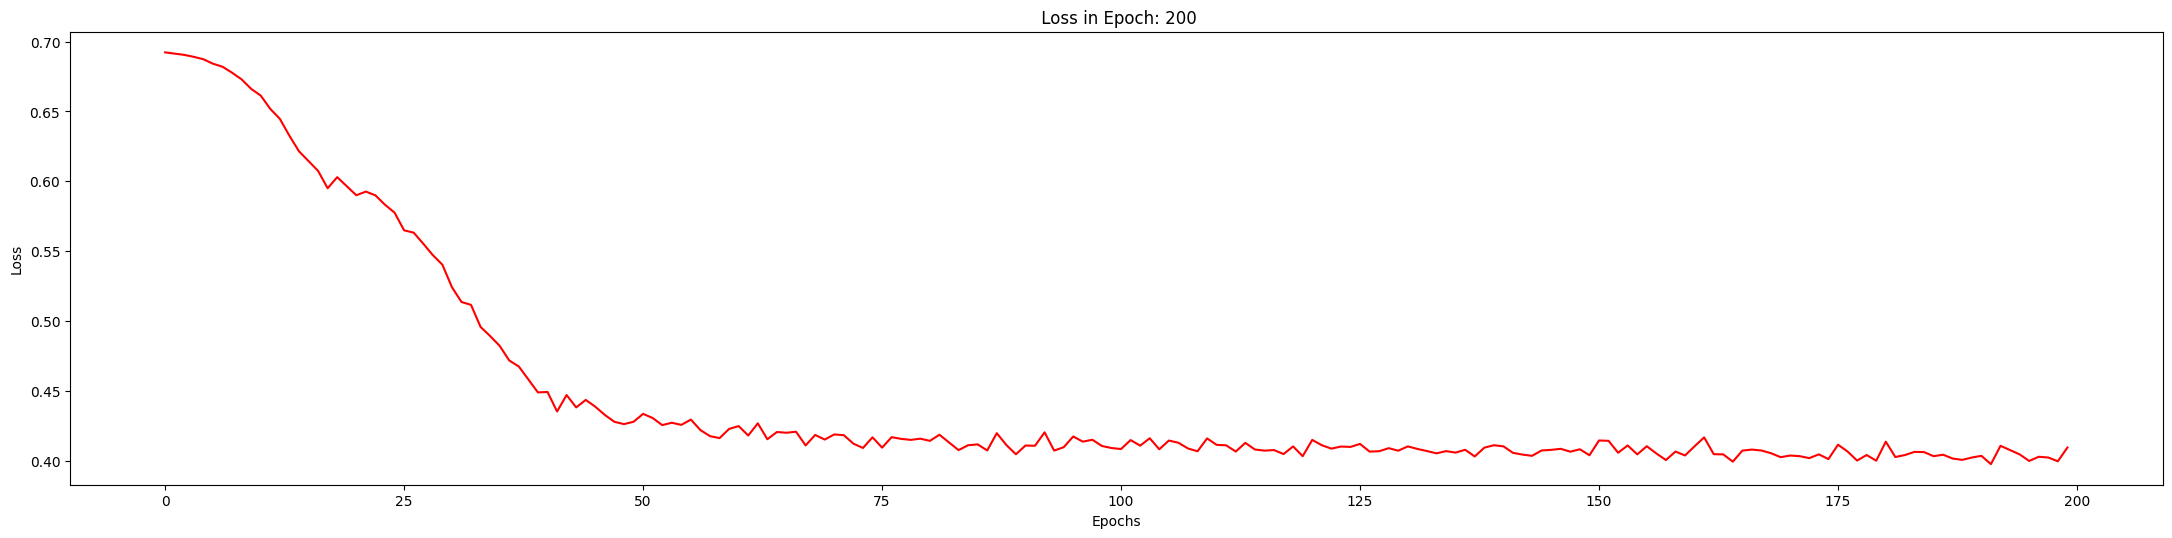

Epoch: 201, Model Loss: 0.3996
Epoch: 202, Model Loss: 0.3999
Epoch: 203, Model Loss: 0.4029
Epoch: 204, Model Loss: 0.4021
Epoch: 205, Model Loss: 0.3977
Epoch: 206, Model Loss: 0.4045
Epoch: 207, Model Loss: 0.4003
Epoch: 208, Model Loss: 0.3989
Epoch: 209, Model Loss: 0.4009
Epoch: 210, Model Loss: 0.3996
Epoch: 211, Model Loss: 0.3972
Epoch: 212, Model Loss: 0.4034
Epoch: 213, Model Loss: 0.3983
Epoch: 214, Model Loss: 0.4015
Epoch: 215, Model Loss: 0.4087
Epoch: 216, Model Loss: 0.4013
Epoch: 217, Model Loss: 0.3968
Epoch: 218, Model Loss: 0.4014
Epoch: 219, Model Loss: 0.3988
Epoch: 220, Model Loss: 0.3995
Epoch: 221, Model Loss: 0.4040
Epoch: 222, Model Loss: 0.4062
Epoch: 223, Model Loss: 0.3995
Epoch: 224, Model Loss: 0.4018
Epoch: 225, Model Loss: 0.3972
Epoch: 226, Model Loss: 0.4032
Epoch: 227, Model Loss: 0.3992
Epoch: 228, Model Loss: 0.3961
Epoch: 229, Model Loss: 0.4035
Epoch: 230, Model Loss: 0.3973
Epoch: 231, Model Loss: 0.4010
Epoch: 232, Model Loss: 0.4013
Epoch: 2

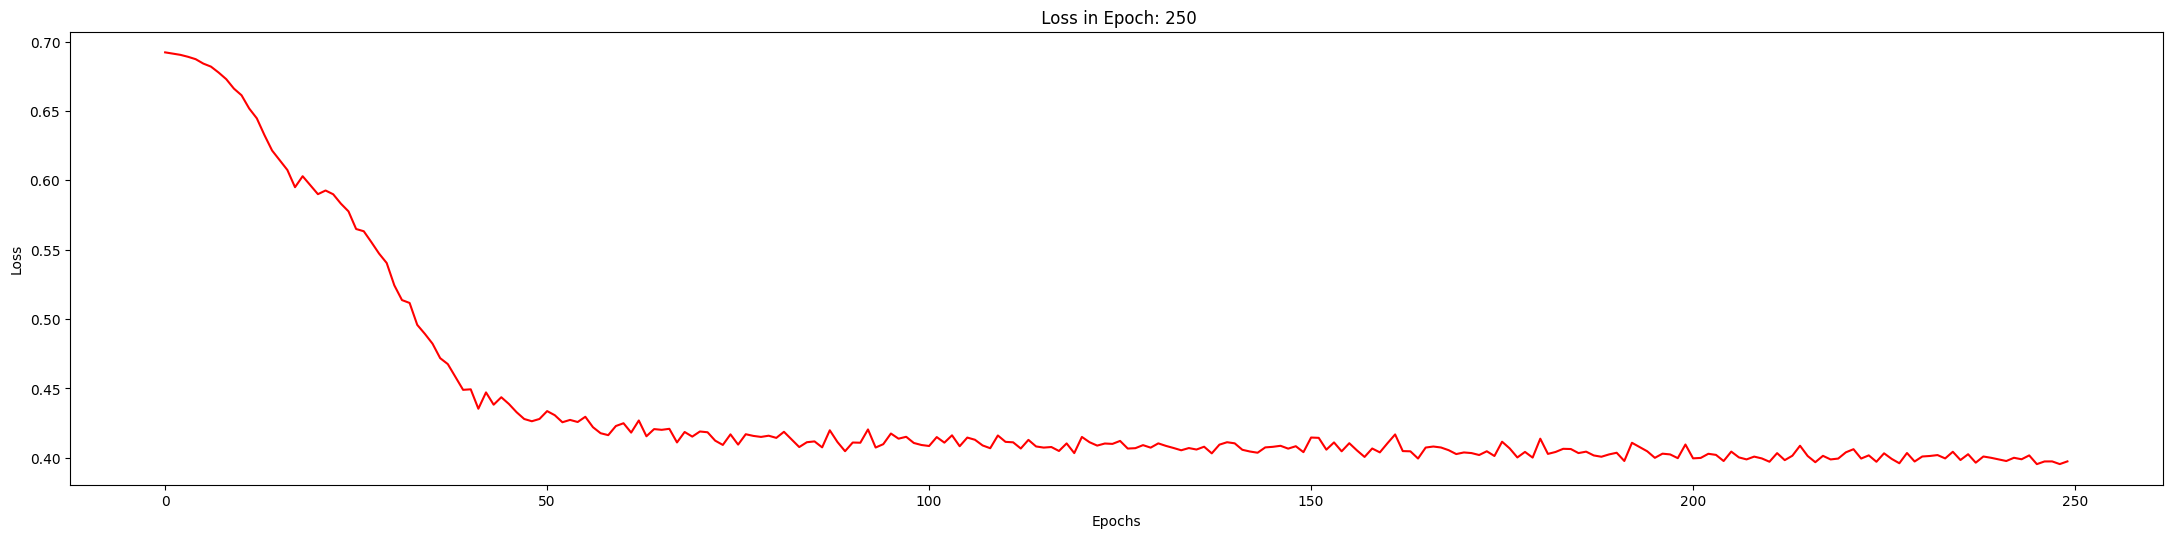

Epoch: 251, Model Loss: 0.4082
Epoch: 252, Model Loss: 0.3971
Epoch: 253, Model Loss: 0.3973
Epoch: 254, Model Loss: 0.3972
Epoch: 255, Model Loss: 0.3990
Epoch: 256, Model Loss: 0.4010
Epoch: 257, Model Loss: 0.4060
Epoch: 258, Model Loss: 0.3989
Epoch: 259, Model Loss: 0.3990
Epoch: 260, Model Loss: 0.3963
Epoch: 261, Model Loss: 0.3985
Epoch: 262, Model Loss: 0.3963
Epoch: 263, Model Loss: 0.3982
Epoch: 264, Model Loss: 0.4033
Epoch: 265, Model Loss: 0.3981
Epoch: 266, Model Loss: 0.3972
Epoch: 267, Model Loss: 0.3985
Epoch: 268, Model Loss: 0.3980
Epoch: 269, Model Loss: 0.3991
Epoch: 270, Model Loss: 0.3998
Epoch: 271, Model Loss: 0.3948
Epoch: 272, Model Loss: 0.3978
Epoch: 273, Model Loss: 0.4020
Epoch: 274, Model Loss: 0.4022
Epoch: 275, Model Loss: 0.3988
Epoch: 276, Model Loss: 0.4001
Epoch: 277, Model Loss: 0.4002
Epoch: 278, Model Loss: 0.3975
Epoch: 279, Model Loss: 0.3971
Epoch: 280, Model Loss: 0.3964
Epoch: 281, Model Loss: 0.3981
Epoch: 282, Model Loss: 0.4019
Epoch: 2

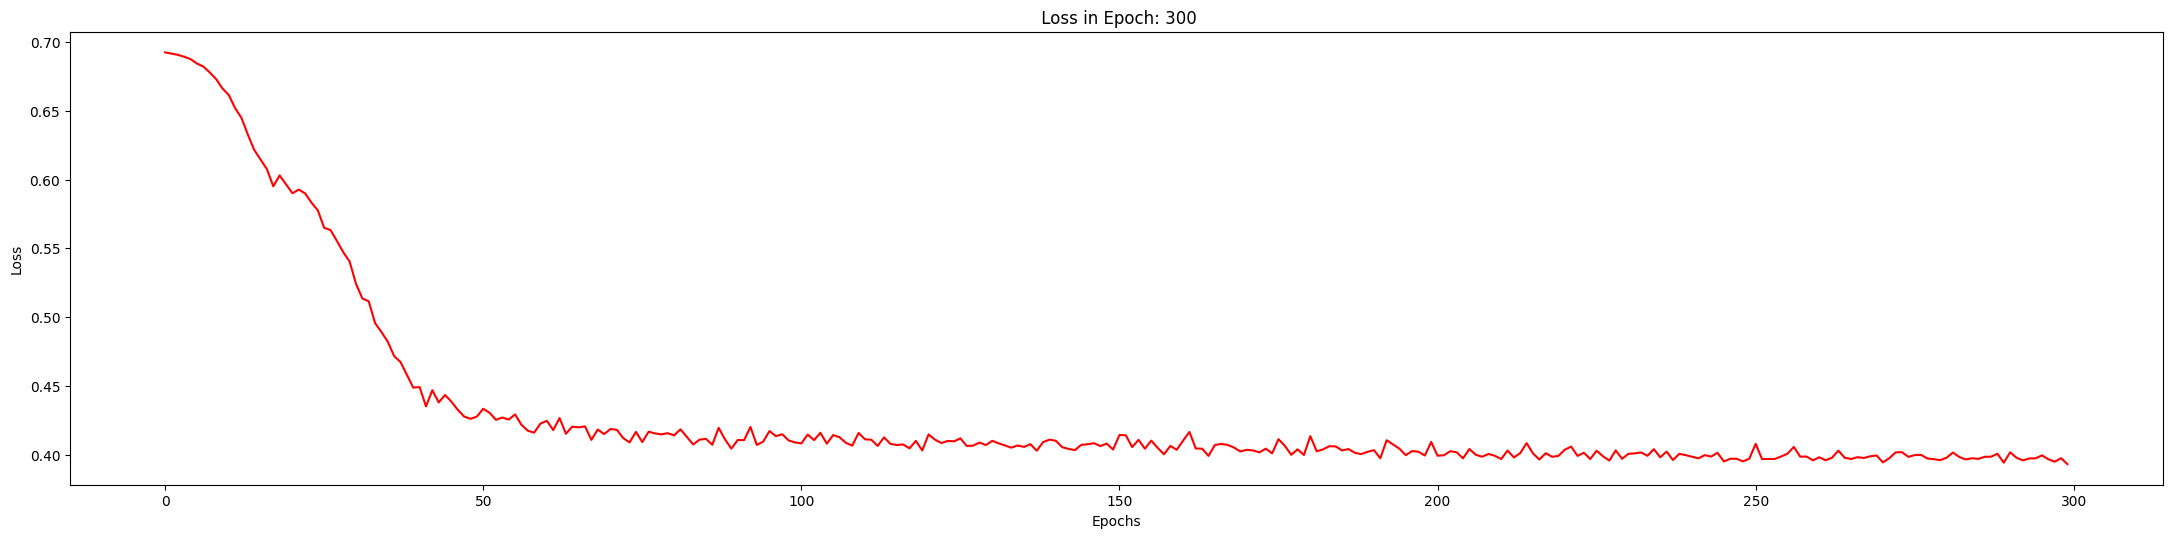

In [14]:
EPOCHS = 300
load_index = 0

train(EPOCHS, load_index)

In [15]:
GNN_Model_test_predicted_labels = []
def GNN_Model_test(test_loader):
    GNN_Model.eval()
    correct = 0
    for batch_of_graphs in test_loader:

        final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, softmaxed_h2 = GNN_Model(batch_of_graphs, None)
        GNN_Model_test_pred = softmaxed_h2.argmax(dim=1) .tolist()[0]
        GNN_Model_test_predicted_labels.append(GNN_Model_test_pred)
        correct += int((GNN_Model_test_pred == batch_of_graphs.y).sum())
    return correct / len(test_loader.dataset), GNN_Model_test_predicted_labels

In [16]:
GNN_Model_test_acc, predicted_labels = GNN_Model_test(test_dataloader)
print(f'Test Accuracy: {GNN_Model_test_acc:.4f}')

Test Accuracy: 0.7368


In [17]:
def instance_time(test_dataset):
    instance_based_time = []
    GNN_Model.eval()
    correct = 0
    for batched_data in test_dataset:
        start_generation = perf_counter()
        final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, softmaxed_h2 = GNN_Model(batched_data, None)
        GNN_Model_test_pred = softmaxed_h2.argmax(dim=1)
        consumed_time = perf_counter() - start_generation
        instance_based_time.append(consumed_time)
    return instance_based_time

In [18]:
samples_time = instance_time(test_dataset)
print(f'Test Instance based Time: {samples_time}')

Test Instance based Time: [0.003723223000008602, 0.010372257000000218, 0.0020968359999926633, 0.0020327059999942776, 0.0022899340000037682, 0.002338683999994373, 0.0016371600000013586, 0.0019374849999849175, 0.002791755999993484, 0.0020758360000172615, 0.001958701000006613, 0.0018251639999959934, 0.001825609000007944, 0.002209910000004811, 0.0019085080000138532, 0.0017460560000017722, 0.00200856300000396, 0.0014957420000030197, 0.001435006000008343, 0.001387587000010626, 0.0013518620000070314, 0.0013777080000068054, 0.001325226999995266, 0.0014371419999861246, 0.0019274580000114838, 0.0021028409999814812, 0.0014360179999926004, 0.0014199790000191115, 0.0013012430000003405, 0.0013132519999885517, 0.001312881999979254, 0.0012705719999814846, 0.0014648199999953704, 0.0017424629999993613, 0.0016716529999882823, 0.0013133939999931954, 0.0012728890000062165, 0.0013245019999885699]


In [19]:
real_labels = []
for graph in test_dataloader:
    real_labels.append(graph.y.tolist()[0])

In [20]:
print("predicted_labels: ", predicted_labels)
print("real_labels: ", real_labels)
print("Test Accuracy: ", metrics.accuracy_score(real_labels, predicted_labels))

predicted_labels:  [1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1]
real_labels:  [1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1]
Test Accuracy:  0.7368421052631579


In [21]:
Auc_Roc = metrics.roc_auc_score(real_labels, predicted_labels)
precision, recall, thresholds = metrics.precision_recall_curve(real_labels, predicted_labels)
Auc_Prc = metrics.auc(y=precision, x=recall)
Acc = metrics.accuracy_score(real_labels, predicted_labels, normalize=True)
Acc2 = metrics.accuracy_score(real_labels, predicted_labels, normalize=False)
print("Auc_Roc: ", Auc_Roc, "Auc_Prc: ", Auc_Prc, "Acc: ", Acc, "Acc2: ", Acc2)

Auc_Roc:  0.7321428571428571 Auc_Prc:  0.8630382775119618 Acc:  0.7368421052631579 Acc2:  28


In [24]:
def power_divergence(X, Y, Z, data_pertubed_Samples, lambda_, significance_level):
    if hasattr(Z, "__iter__"):
        Z = list(Z)
    else:
        raise (f"Z must be an iterable. Got object type: {type(Z)}")

    if (X in Z) or (Y in Z):
        raise ValueError(f"The variables X or Y can't be in Z. Found {X if X in Z else Y} in Z.")
    if len(Z) == 0:
        chi, p_value, dof, expected = stats.chi2_contingency(
            data_pertubed_Samples.groupby([X, Y]).size().unstack(Y, fill_value=0), lambda_=lambda_
        )
    else:
        chi = 0
        dof = 0
        for z_state, df in data_pertubed_Samples.groupby(Z):
            try:
                c, _, d, _ = stats.chi2_contingency(df.groupby([X, Y]).size().unstack(Y, fill_value=0), lambda_=lambda_)
                chi += c
                dof += d
            except ValueError:
                if isinstance(z_state, str):
                    logging.info(f"Skipping the test {X} \u27C2 {Y} | {Z[0]}={z_state}. Not enough samples")
                else:
                    z_str = ", ".join([f"{var}={state}" for var, state in zip(Z, z_state)])
                    logging.info(f"Skipping the test {X} \u27C2 {Y} | {z_str}. Not enough samples")
        p_value = 1 - stats.chi2.cdf(chi, df=dof)
    return chi, p_value, dof

In [ ]:
def cressie_read(X, Y, Z, data_pertubed_Samples, significance_level):
    return power_divergence(X=X, Y=Y, Z=Z, data_pertubed_Samples=data_pertubed_Samples, lambda_="cressie-read", significance_level=significance_level)

In [ ]:
x = [3.01599503e-05, 0.00000000e+00, 2, 3.01599503e-05, 1]
y = np.array(x)
print(y)
z = np.argsort(y)[-3:]
print(z)

[3.01599503e-05 0.00000000e+00 2.00000000e+00 3.01599503e-05
 1.00000000e+00]
[3 4 2]


In [22]:
class PGM_Graph_Explainer(object):
    def __init__(self, Model_Name, classifier_load_index, input_dim, hid_dim, output_dim, graph, perturb_feature_list, perturb_mode, perturb_indicator):
        self.Model_Name = Model_Name
        self.Task_name = 'Graph Classification'
        self.Explainability_name = "PGMExplainer"
        self.your_model = self.load_model(Task_name=self.Task_name, Explainability_name=self.Explainability_name, Model_Name=Model_Name,
                                          classifier_load_index=classifier_load_index, input_dim=input_dim, hid_dim=hid_dim, output_dim=output_dim)
        self.your_model.eval()

        self.graph = graph
        self.num_layers = 2
        self.perturb_feature_list = perturb_feature_list
        self.perturb_mode = perturb_mode
        self.perturb_indicator = perturb_indicator
        self.node_feat = graph.x.numpy()


    def load_model(self, Task_name, Explainability_name, Model_Name, classifier_load_index, input_dim, hid_dim, output_dim):

        if classifier_load_index != 0:
            GNN_Model, optimizer, classifier_load_index = self.loading_config(Task_name=Task_name, Explainability_name=Explainability_name, Model_Name=Model_Name,
                                                                              classifier_load_index=classifier_load_index, input_dim=input_dim, hid_dim=hid_dim,
                                                                              output_dim=output_dim)
            return GNN_Model
        else:

            GNN_Model = dgcnn_model.DGCNN_Model(GNN_layers=[32, 32, 32, 7], num_classes=2, mlp_act_fun='ReLu', dgcnn_act_fun='tanh',
                                                mlp_dropout_rate=0.5, Weight_Initializer=3, Bias=False, dgcnn_k=17, node_feat_size=7,
                                                hid_channels=[16,32], conv1d_kernels=[2,5], ffn_layer_size=128, strides=[2,1])
            return GNN_Model

    def loading_config(self, Task_name, Explainability_name, Model_Name, classifier_load_index, input_dim, hid_dim, output_dim):

        GNN_Model = dgcnn_model.DGCNN_Model(GNN_layers=[32, 32, 32, 7], num_classes=2, mlp_act_fun='ReLu', dgcnn_act_fun='tanh',
                                            mlp_dropout_rate=0.5, Weight_Initializer=3, Bias=False, dgcnn_k=17, node_feat_size=7,
                                            hid_channels=[16,32], conv1d_kernels=[2,5], ffn_layer_size=128, strides=[2,1])
        optimizer = torch.optim.Adam(params=GNN_Model.parameters(), lr=0.001, weight_decay=1e-6)
        checkpoint = torch.load("/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/" + File_Name + str(classifier_load_index)+".pt")
        GNN_Model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        epoch = checkpoint['epoch']
        loss = checkpoint['loss']

        return GNN_Model, optimizer, epoch

    def cressie_read(self, X, Y, Z, data_pertubed_Samples, significance_level):
        return self.power_divergence(X=X, Y=Y, Z=Z, data_pertubed_Samples=data_pertubed_Samples, lambda_="cressie-read", significance_level=significance_level)

    def power_divergence(self, X, Y, Z, data_pertubed_Samples, lambda_, significance_level):
        if hasattr(Z, "__iter__"):
            Z = list(Z)
        else:
            raise (f"Z must be an iterable. Got object type: {type(Z)}")

        if (X in Z) or (Y in Z):
            raise ValueError(f"The variables X or Y can't be in Z. Found {X if X in Z else Y} in Z.")
        if len(Z) == 0:
            chi, p_value, dof, expected = stats.chi2_contingency(
                data_pertubed_Samples.groupby([X, Y]).size().unstack(Y, fill_value=0), lambda_=lambda_
            )
        else:
            chi = 0
            dof = 0
            for z_state, df in data_pertubed_Samples.groupby(Z):
                try:
                    c, _, d, _ = stats.chi2_contingency(df.groupby([X, Y]).size().unstack(Y, fill_value=0), lambda_=lambda_)
                    chi += c
                    dof += d
                except ValueError:
                    if isinstance(z_state, str):
                        logging.info(f"Skipping the test {X} \u27C2 {Y} | {Z[0]}={z_state}. Not enough samples")
                    else:
                        z_str = ", ".join([f"{var}={state}" for var, state in zip(Z, z_state)])
                        logging.info(f"Skipping the test {X} \u27C2 {Y} | {z_str}. Not enough samples")
            p_value = 1 - stats.chi2.cdf(chi, df=dof)
        return chi, p_value, dof


    def perturb_node_features(self, node_feature_matrix, targeted_node_idx, random_perturbation_permission):

        graph_node_features = deepcopy(node_feature_matrix)
        targeted_node_feat_to_perturb_array = deepcopy(graph_node_features[targeted_node_idx])
        # print("targeted_node_feat_to_perturb_array: ", targeted_node_feat_to_perturb_array)
        epsilon = 0.05 * np.max(self.node_feat, axis = 0)

        if random_perturbation_permission == 1:
            for i in range(targeted_node_feat_to_perturb_array.shape[0]):
                if i in self.perturb_feature_list:
                    if self.perturb_mode == "mean":
                        targeted_node_feat_to_perturb_array[i] = np.mean(node_feature_matrix[:,i])
                    elif self.perturb_mode == "zero":
                        targeted_node_feat_to_perturb_array[i] = 0
                    elif self.perturb_mode == "max":
                        targeted_node_feat_to_perturb_array[i] = np.max(node_feature_matrix[:,i])
                    elif self.perturb_mode == "uniform":
                        targeted_node_feat_to_perturb_array[i] = targeted_node_feat_to_perturb_array[i] + np.random.uniform(low=-epsilon[i], high=epsilon[i])
                        if targeted_node_feat_to_perturb_array[i] < 0:
                            targeted_node_feat_to_perturb_array[i] = 0
                        elif targeted_node_feat_to_perturb_array[i] > np.max(self.node_feat, axis = 0)[i]:
                            targeted_node_feat_to_perturb_array[i] = np.max(self.node_feat, axis = 0)[i]


        graph_node_features[targeted_node_idx] = targeted_node_feat_to_perturb_array

        return graph_node_features

    def gather_perturbed_node_features(self, sampling_count, index_to_perturb, percentage, p_value_threshold, pred_threshold):

        final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, pred_torch = GNN_Model(self.graph, None)
        pred_label = pred_torch.argmax(dim=1)

        num_nodes_in_graph = self.node_feat.shape[0]

        Samples = []
        for iteration in range(sampling_count):
            graph_original_features = deepcopy(self.node_feat)
            sample = []
            for node_index in range(num_nodes_in_graph):
                if node_index in index_to_perturb:
                    seed = np.random.randint(100)
                    if seed < percentage:
                        random_perturbation_permission = 1
                        graph_perturbed_features = self.perturb_node_features(node_feature_matrix=graph_original_features, targeted_node_idx=node_index,
                                                                              random_perturbation_permission=random_perturbation_permission)
                    else:
                        random_perturbation_permission = 0
                else:
                    random_perturbation_permission = 0
                sample.append(random_perturbation_permission)

                perturbed_graph = deepcopy(self.graph)
                if random_perturbation_permission:
                    graph_perturbed_features_torch =  torch.tensor(graph_perturbed_features, dtype=torch.float)
                    perturbed_graph.x = graph_perturbed_features_torch

                final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, pred_perturb_torch = GNN_Model(perturbed_graph, None)


                pred_change = max(pred_torch[0].tolist()) - pred_perturb_torch[0].tolist()[pred_label]

                sample.append(pred_change)
            Samples.append(sample)

        Samples = np.asarray(Samples)
        if self.perturb_indicator == "abs":
            Samples = np.abs(Samples)

        top = int(sampling_count/8)
        top_idx = np.argsort(Samples[:, num_nodes_in_graph])[-top:]

        for i in range(sampling_count):
            if i in top_idx:
                Samples[i,num_nodes_in_graph] = 1
            else:
                Samples[i,num_nodes_in_graph] = 0

        return Samples

    def explain(self, num_samples, percentage, top_node, p_value_threshold, pred_threshold, ctg):


        if top_node == None:
            top_node = int(self.node_feat.shape[0]/8)

#         Round 1
        Samples = self.gather_perturbed_node_features(sampling_count=num_samples, index_to_perturb=range(self.node_feat.shape[0]), percentage=percentage,
                                                      p_value_threshold=p_value_threshold, pred_threshold=pred_threshold)
        #print(len(Samples[0]), " Samples: ", list(Samples))
        data_pertubed_Samples1 = pd.DataFrame(Samples)
        #est = ConstraintBasedEstimator(data)

        p_values = []
        candidate_nodes = []
        # The entry for the graph classification data is at "num_nodes"
        for node in range(self.node_feat.shape[0]):
            chi2, p, dof = self.cressie_read(X=node, Y=self.node_feat.shape[0], Z=[], data_pertubed_Samples=data_pertubed_Samples1, significance_level=0.05)
            #print("this is returned P: ", p)
            p_values.append(p)


        number_candidates = top_node
        candidate_nodes = np.argpartition(p_values, number_candidates)[0:number_candidates]

#         Round 2
        Samples = self.gather_perturbed_node_features(sampling_count=num_samples, index_to_perturb=candidate_nodes, percentage=percentage,
                                                      p_value_threshold=p_value_threshold, pred_threshold=pred_threshold)
        data = pd.DataFrame(Samples)
        #est = ConstraintBasedEstimator(data)

        p_values = []
        dependent_nodes = []

        for node in range(self.node_feat.shape[0]):
            chi2, p, dof = self.cressie_read(X=node, Y=self.node_feat.shape[0], Z=[], data_pertubed_Samples=data, significance_level=0.05)
            #chi2, p = chi_square(node, target, [], data)
            p_values.append(p)
            if p < p_value_threshold:
                dependent_nodes.append(node)

        if ctg == 'correct':
            top_p = np.min((top_node, self.node_feat.shape[0]-1))
        elif ctg == 'incorrect':
            top_p = np.max((top_node, self.node_feat.shape[0]-1))
        ind_top_p = np.argpartition(p_values, top_p)[0:top_p]
        pgm_nodes = list(ind_top_p)

        return pgm_nodes, p_values, candidate_nodes, dependent_nodes

input_graph = dataset[0]
pgmx = PGM_Graph_Explainer(Model_Name="DGCNN", classifier_load_index=300, input_dim=7, hid_dim=7, output_dim=2, graph=input_graph,
                           perturb_feature_list=[None], perturb_mode = "mean", perturb_indicator = "abs")



pgm_nodes, p_values, candidate_nodes, dependent_nodes = pgmx.explain(num_samples=len(input_graph.x), percentage=50, top_node=3, p_value_threshold=0.05,
                                                                     pred_threshold=0.1, ctg='correct')
print("pgm_nodes: ", pgm_nodes, " p_values: ", p_values, " candidate_nodes: ", candidate_nodes, "dependent_nodes: ", dependent_nodes)

tanh is Selected.
pgm_nodes:  [12, 14, 11]  p_values:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]  candidate_nodes:  [16 12 10] dependent_nodes:  []


In [23]:
pgm_nodes_for_each_graph_correct = []
pgm_nodes_for_each_graph_incorrect = []
time_consumption = []

for i in range(len(test_dataset)):

    pgmx = PGM_Graph_Explainer(Model_Name="DGCNN", classifier_load_index=300, input_dim=7, hid_dim=7, output_dim=2,
                               graph=test_dataset[i], perturb_feature_list=[None], perturb_mode = "mean", perturb_indicator = "abs")
    start_time = perf_counter()
    pgm_node_correct, p_values_correct, candidate_nodes_correct, dependent_nodes_correct = pgmx.explain(num_samples=len(test_dataset[i].x), percentage=50,
                                                                                                        top_node=3, p_value_threshold=0.05, pred_threshold=0.1,
                                                                                                        ctg='correct')
    pgm_nodes_for_each_graph_correct.append(pgm_node_correct)
    print(pgm_node_correct)
    time_consumption.append(perf_counter() - start_time)
    pgm_node_incorrect, p_values_incorrect, candidate_nodes_incorrect, dependent_nodes_incorrect = pgmx.explain(num_samples=len(test_dataset[i].x), percentage=50,
                                                                                                                top_node=3, p_value_threshold=0.05, pred_threshold=0.1,
                                                                                                                ctg='incorrect')
    pgm_nodes_for_each_graph_incorrect.append(pgm_node_incorrect)
    print(pgm_node_incorrect)



tanh is Selected.
[16, 8, 14]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16]
tanh is Selected.
[9, 8, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12]
tanh is Selected.
[9, 8, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
tanh is Selected.
[0, 10, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
tanh is Selected.
[16, 15, 13]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
tanh is Selected.
[12, 4, 14]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
tanh is Selected.
[16, 12, 14]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
tanh is Selected.
[10, 12, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
tanh is Selected.
[12, 14, 11]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
tanh is Selected.
[11, 12, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
tanh is Selected.
[9, 10, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
tanh is Selected.
[14, 0, 15]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
tanh is Selected.
[8, 15, 

In [24]:
print(len(time_consumption))
print("time_consumption: ", time_consumption)
print(statistics.mean(time_consumption))

38
time_consumption:  [3.390613520000045, 0.6426592710000136, 0.6642016650000073, 0.5788860250000312, 1.515067031000001, 1.5230414019999898, 2.356572000999961, 0.7553055719999975, 1.1326021630000014, 0.8593598499999757, 0.554248747000031, 2.0051598620000277, 2.296509576999995, 0.9731952569999862, 1.9796023779999814, 0.395647901000018, 1.377659964999964, 2.8372255190000146, 0.9786854450000533, 2.0085794649999684, 0.7967562360000215, 1.3661084770000116, 2.657052555000007, 1.0654548320000004, 0.8500972520000118, 0.5575585860000274, 2.338151573999994, 1.3325097630000187, 0.6426128589999962, 0.9772189160000266, 0.9659434370000213, 0.5604616379999925, 0.5490831640000238, 0.7846989569999892, 2.224644791000003, 0.6611005099999829, 0.6583494249999831, 1.8154810340000154]
1.3060028058421103


In [25]:
test_dataset_dropped_correct = deepcopy(test_dataset)
test_dataset_dropped_incorrect = deepcopy(test_dataset)


for i in range(len(pgm_nodes_for_each_graph_correct)):
    for j in range(len(test_dataset_dropped_correct[i].x)):
        if j not in pgm_nodes_for_each_graph_correct[i]:
            test_dataset_dropped_correct[i].x[j] = torch.zeros_like(test_dataset_dropped_correct[i].x[j])

for i in range(len(pgm_nodes_for_each_graph_incorrect)):
    for j in range(len(test_dataset_dropped_incorrect[i].x)):
        if j not in pgm_nodes_for_each_graph_incorrect[i]:
            test_dataset_dropped_incorrect[i].x[j] = torch.zeros_like(test_dataset_dropped_incorrect[i].x[j])


In [56]:
print(pgm_nodes_for_each_graph_correct[0])
print(test_dataset_dropped_correct[0].x)

[12, 14, 11]
tensor([[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]])


In [26]:
class0_listed = []
for graph in test_dataset_dropped_correct:
    graph_list = []
    for node in graph.x:
        graph_list.append(max(node).tolist())
    class0_listed.append(graph_list)
print(class0_listed)

class1_listed = []
for graph in test_dataset_dropped_incorrect:
    graph_list = []
    for node in graph.x:
        graph_list.append(max(node).tolist())
    class1_listed.append(graph_list)
print(class1_listed)

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0,

In [25]:
Model_Load_iNdex = 300
#GNN_Model = Graph_Network.GCN_plus_GAP(model_name=Model_Name, model_level='graph', input_dim=7, hidden_dim=7, output_dim=2, num_hid_layers=2, Bias=True, act_fun='eLu', Weight_Initializer=1, dropout_rate=0.1)
GNN_Model = dgcnn_model.DGCNN_Model(GNN_layers=[32, 32, 32, 7], num_classes=2, mlp_act_fun='ReLu', dgcnn_act_fun='tanh', mlp_dropout_rate=0.5,
                                    Weight_Initializer=3, Bias=False, dgcnn_k=17, node_feat_size=7, hid_channels=[16,32], conv1d_kernels=[2,5],
                                    ffn_layer_size=128, strides=[2,1])
optimizer = torch.optim.Adam(params=GNN_Model.parameters(), lr=classifier_lr, weight_decay=classifier_weight_decay)
checkpoint = torch.load("/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/" + File_Name + str(Model_Load_iNdex)+".pt")
GNN_Model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

tanh is Selected.


In [27]:
import sys
from importlib import reload
py_path = '/content/drive/MyDrive/Explainability Methods/Evaluation of Explainability Methods/Script/'
sys.path.insert(0,py_path)
import evaluation_of_xmethods_fidelity_plus as eval_xai_fid_plus
eval_xai_fid_plus = reload(eval_xai_fid_plus)

In [28]:
fid_xmethod_example_2 = eval_xai_fid_plus.evalaution_of_xmethods_fidelity_plus(a_trained_model=GNN_Model, test_data=test_dataset)
fid_score2 = fid_xmethod_example_2.my_fidelity(saliency_class0=class0_listed, saliency_class1=class1_listed, importance_threshold=0.5,
                                               style="Node")
print(fid_score2)

0.07738095238095244


In [29]:
import sys
py_path = '/content/drive/MyDrive/Explainability Methods/Evaluation of Explainability Methods/Script/'
sys.path.insert(0,py_path)
import evaluation_of_xmethods_contrastivity as eval_xai_contrastivity
eval_xai_contrastivity = reload(eval_xai_contrastivity)

In [30]:
contrastivity_xmethod_example = eval_xai_contrastivity.evalaution_of_xmethods_contrastivity(a_trained_model=GNN_Model,
                                                                                            test_data=test_dataset)
contrastivity_score = contrastivity_xmethod_example.my_contrastivity(test_dataset, class0_listed, class1_listed, importance_threshold=0.5,
                                                                     contrast_coeff=1)
print("Contrastivity_Score: ", contrastivity_score)

Contrastivity_Score:  0.7479097046940704


In [31]:
import sys
py_path = '/content/drive/MyDrive/Explainability Methods/Evaluation of Explainability Methods/Script/'
sys.path.insert(0,py_path)
import evaluation_of_xmethods_sparsity as eval_xai_sparsity
eval_xai_sparsity = reload(eval_xai_sparsity)

In [32]:
sparsity_xmethod_example = eval_xai_sparsity.evalaution_of_xmethods_sparsity(a_trained_model=GNN_Model, test_data=test_dataset)
sparsity_score = sparsity_xmethod_example.my_sparsity(test_dataset, class0_listed, class1_listed, importance_threshold=0.5)
print("Sparsity_Score: ", sparsity_score)

Sparsity_Score:  0.43620343236546805


In [47]:
def Compute_ROC_AUC(your_model, your_dataset, masked):
    preds = []
    reals = []
    if masked == False:
        your_model.eval()
        for batched_data in your_dataset:
            #Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = your_model(batched_data)
            #preds.append(soft.cpu().detach())
            final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, softmaxed_h2 = your_model(batched_data, None)
            preds.append(softmaxed_h2.cpu().detach())
    else:

        your_model.eval()
        for masked_batch in masked:
            #Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = your_model(masked_batch)
            #preds.append(soft.cpu().detach())
            final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, softmaxed_h2 = your_model(masked_batch, None)
            preds.append(softmaxed_h2.cpu().detach())


    for i, batched_graph in enumerate(your_dataset):
        reals.append(batched_graph.y.cpu().detach().tolist())
    #preds = torch.cat(preds).cpu().numpy()
    #preds = preds[:, 1]
    preds = torch.cat(preds)
    #print(preds)
    preds, max_idxs = torch.max(preds[:], dim=1)
    #print(preds)
    roc_auc = metrics.roc_auc_score(reals, preds, average='macro')
    return roc_auc


def Fidelity_computation(your_model, your_dataset, importance_threshold):
    auc_roc_before_droping_important_nodes = Compute_ROC_AUC(your_model, your_dataset, False)
    print("auc_roc_before_droping_important_nodes: ", auc_roc_before_droping_important_nodes)

    auc_roc_after_droping_important_nodes = Compute_ROC_AUC(your_model, your_dataset, test_dataset_dropped_correct)
    print("auc_roc_after_droping_important_nodes: ", auc_roc_after_droping_important_nodes)

    return auc_roc_before_droping_important_nodes - auc_roc_after_droping_important_nodes
fid0 = Fidelity_computation(GNN_Model, test_dataset, test_dataset_dropped_correct)
fid1 = Fidelity_computation(GNN_Model, test_dataset, test_dataset_dropped_incorrect)
print("Fidelity: ", statistics.mean([fid0, fid1]))

auc_roc_before_droping_important_nodes:  0.4732142857142857
auc_roc_after_droping_important_nodes:  0.425595238095238
auc_roc_before_droping_important_nodes:  0.4732142857142857
auc_roc_after_droping_important_nodes:  0.425595238095238
Fidelity:  0.04761904761904767


In [32]:
def crs_subgraph_saliency(your_dataset, masked_data_class0, masked_data_class1):
    binary_scores_class0 = []
    binary_scores_class1 = []
    for graph_main, graph0, graph1 in zip(your_dataset, masked_data_class0, masked_data_class1):
        binary_score_class0 = ''
        binary_score_class1 = ''
        for node_main, node0, node1 in zip(graph_main.x, graph0.x, graph1.x):
            if sum(node0) == 0:
                binary_score_class0 += '1'
            else:
                binary_score_class0 += '0'
            if sum(node1) == 0:
                binary_score_class1 += '1'
            else:
                binary_score_class1 += '0'
        binary_scores_class0.append(binary_score_class0)
        binary_scores_class1.append(binary_score_class1)
    #print("binary_scores_class0: ", binary_scores_class0)
    #print("binary_scores_class1: ", binary_scores_class1)
    return binary_scores_class0, binary_scores_class1

def hamming_distance(string1, string2):

    distance = 0
    L = len(string1)
    for i in range(L):
        if string1[i] != string2[i]:
            distance += 1
    return distance

def compute_contrastivity(your_dataset, masked_data_class0, masked_data_class1):
    binary_scores_class0, binary_scores_class1 = crs_subgraph_saliency(your_dataset, masked_data_class0, masked_data_class1)
    h_dist_list = []
    for cor_bin_scores, incor_bin_scores in zip(binary_scores_class0, binary_scores_class1):
        h_distance = hamming_distance(cor_bin_scores, incor_bin_scores)/len(cor_bin_scores)
        h_dist_list.append(h_distance)
    return statistics.mean(h_dist_list)



crs = compute_contrastivity(test_dataset, test_dataset_dropped_correct, test_dataset_dropped_incorrect)
print("Contrastivity: ", crs)

Contrastivity:  0.7448137294618722


In [34]:
def spr_subgraph_saliency(masked_data_class0, masked_data_class1):
    binary_scores_class0 = []
    binary_scores_class1 = []
    for graph0, graph1 in zip(masked_data_class0, masked_data_class1):
        binary_score_class0 = []
        binary_score_class1 = []
        for node0, node1 in zip(graph0.x, graph1.x):
            if sum(node0) == 0:
                binary_score_class0.append(1)
            else:
                binary_score_class0.append(0)
            if sum(node1) == 0:
                binary_score_class1.append(1)
            else:
                binary_score_class1.append(0)
        binary_scores_class0.append(binary_score_class0)
        binary_scores_class1.append(binary_score_class1)

    return binary_scores_class0, binary_scores_class1

def compute_sparsity(masked_data_class0, masked_data_class1):
    binary_scores_class0, binary_scores_class1 = spr_subgraph_saliency(masked_data_class0, masked_data_class1)

    sparsity_list = []
    for cor_binary_score, incor_binary_score in zip(binary_scores_class0, binary_scores_class1):
        sparsity = 1 - ((sum(cor_binary_score) + sum(incor_binary_score))/(2*len(incor_binary_score)))
        sparsity_list.append(sparsity)

    return statistics.mean(sparsity_list)



spr = compute_sparsity(test_dataset_dropped_correct, test_dataset_dropped_incorrect)
print("Sparsity: ", spr)

Sparsity:  0.5637965676345319


In [35]:
print(test_dataset_dropped_incorrect)

[Data(edge_index=[2, 38], x=[17, 7], edge_attr=[38, 4], y=[1]), Data(edge_index=[2, 28], x=[13, 7], edge_attr=[28, 4], y=[1]), Data(edge_index=[2, 28], x=[13, 7], edge_attr=[28, 4], y=[1]), Data(edge_index=[2, 26], x=[12, 7], edge_attr=[26, 4], y=[1]), Data(edge_index=[2, 46], x=[20, 7], edge_attr=[46, 4], y=[1]), Data(edge_index=[2, 38], x=[17, 7], edge_attr=[38, 4], y=[1]), Data(edge_index=[2, 50], x=[22, 7], edge_attr=[50, 4], y=[1]), Data(edge_index=[2, 30], x=[14, 7], edge_attr=[30, 4], y=[1]), Data(edge_index=[2, 36], x=[17, 7], edge_attr=[36, 4], y=[1]), Data(edge_index=[2, 32], x=[15, 7], edge_attr=[32, 4], y=[1]), Data(edge_index=[2, 24], x=[12, 7], edge_attr=[24, 4], y=[1]), Data(edge_index=[2, 44], x=[21, 7], edge_attr=[44, 4], y=[1]), Data(edge_index=[2, 48], x=[23, 7], edge_attr=[48, 4], y=[1]), Data(edge_index=[2, 36], x=[16, 7], edge_attr=[36, 4], y=[1]), Data(edge_index=[2, 54], x=[23, 7], edge_attr=[54, 4], y=[1]), Data(edge_index=[2, 20], x=[10, 7], edge_attr=[20, 4],

In [ ]:
task_dict = {"Graph Classification": "GC", "Node Classification": "NC"}
l = [Explainability_name, task_dict[str(Task_name)], "MUTAG", "GCN+GAP", Auc_Roc, Auc_Prc, GNN_Model_training_Acc_per_epoch[-1], Acc, Acc2, fid, crs, spr, statistics.mean(time_consumption), statistics.mean(GNN_Model_training_time_per_epoch), samples_time]

In [ ]:
task_dict = {"Graph Classification": "GC", "Node Classification": "NC"}
with open("/content/drive/My Drive/Explainability Methods/Evaluation of Explicability Methods/Experimental Results/Comparisons_ExMethods_Final_Format.csv", 'a') as outcsv:
    wr = csv.writer(outcsv, dialect='excel', delimiter=',')
    wr.writerow(l)